# Instance-wise feature selection with symbolic metamodels

In this notebook, we carry out the second experiment (Section 5.2) in our paper *"Demystifying Black-box Models with Symbolic Metamodels"* submitted to **NeurIPS 2019** by *Ahmed M. Alaa and Mihaela van der Schaar*. In this experiment, we evaluate the ability of symbolic metamodels to explain predictions in terms of instancewise feature importance (Section 4). To this end, we replicate the experiments in [1] with the following synthetic data sets: **XOR**, **Nonlinear additive features**, and **Feature switching**. 

## Synthetic datasets

The XOR, nonlinear additive features and feature switching datasets each has a 10-dimensional feature space. The description of each dataset is given below.

- **2-dimensional XOR as binary classification**: The feature $x = (x_1,...,x_{10})$ is a 10-dimensional standard Gaussian $x \sim \mathcal{N}(0,1)$. The response $y$ is generated from $P(y = 1\,|\,x) \propto \exp(x_1\cdot x_2)$.
- **Nonlinear additive model**: The feature $x = (x_1,...,x_{10})$ is generated from a 10-dimensional standard Gaussian $x \sim \mathcal{N}(0,1)$, and the response $y$ is generated from $P(y = 1\,|\,x) \propto \exp\left(−100 \sin(2x_1) + 2|x_2| + x_3 + \exp(-x_4)\right)$.  
- **Switch feature**: Generate $x_1$ from a mixture of two Gaussians centered at $\pm 3$ respectively with equal probability. If $x_1$ is generated from the Gaussian centered at 3, the 2-5th dimensions are used to generate $y$ like the **orange skin** model explained below. Otherwise, the 6-9th dimensions are used to generate y from the nonlinear additive model. 

The **orange skin** model samples the feature  $x = (x_1,...,x_{10})$ is a 10-dimensional standard Gaussian $x \sim \mathcal{N}(0,1)$, and the response is generated from the functional form $P(y = 1 | x) \propto \exp(x_1 + x_2 + x_3 + x_4 − 4)$.   


The datasets above are commonly used in the feature selection literature [1]. The first dataset is designed specifically for feature interaction, whereas the third dataset is designed for instancewise feature selection. In all these datasets, ground-truth about feature importance and interactions are known.

We can import all these synthetic datasets from the module **benchmarks.synthetic_datasets** in **pysymbolic** as follows:

In [1]:
from pysymbolic.benchmarks.synthetic_datasets import *

In the next Section, we layout the experimental setup with more details.

## Experimental setup

For each of the three data sets above, we fit a 2-layer neural network $f(x)$ (with 200 hidden units) to predict the labels based on the 10 features. Since the underlying true features are known for each sample, we use the median feature importance ranking of each algorithm as its performance metric as in [2]. To explicitly fit the predictive model in each dataset, we use a Keras-based neural network model which can be imported from **algorithms.keras_predictive_models** in **pysymbolic** as follows:

In [ ]:
from pysymbolic.algorithms.keras_predictive_models import *

We will not explicitly fit the model to the datasets in this notebook as this will be done automatically inside the **get_instancewise_median_ranks** function as we will show later. In the following cell, we provide an example of how to generate a dataset and fit a model:

In [ ]:
x_train, y_train, x_test, y_test, datatype_val = create_data("XOR", n = 1000)

predictive_model   = get_predictive_model(x_train, y_train, model_type="keras")

In the following experiments, we will be explaning the predictions of the model **predictive_model** via instance-wise feature selection.  

## Benchmarks

We compare the performance of our symbolic metamodeling (SM) approach with the following benchmarks: 

- **DeepLIFT**: An activation propagation approach for feature importance that is specific to deep learning models [4]. 
- **SHAP**: A shapley value based approach to generlized additive models presented in [3].
- **LIME**: Feature importance via local linear approximations [5].
- **L2X**: (Learning to explain) An information-theoretic approach presented in [2].
- **SR**: A symbolic regression approach [6].

All of the benchmarks above are implemented in the module **algorithms.instancewise_feature_selection** in **pysymbolic**.

## Running the experiments

As mentioned before, since the underlying true features are known for each sample, we use the median feature importance ranking of each algorithm as its performance metric as in [2]. In the following, we compute the median feature ranks for all the benchmarks above for all of the 3 datasets.

In [ ]:
# Initialize dictionary of results for all methods

from pysymbolic.algorithms.instancewise_feature_selection import *

benchmark_dictionary = {'SM'      : {'XOR': [],'nonlinear_additive': [], 'switch': []},
                        'SR'      : {'XOR': [],'nonlinear_additive': [], 'switch': []}, 
                        'LIME'    : {'XOR': [],'nonlinear_additive': [], 'switch': []},
                        'DeepLIFT': {'XOR': [],'nonlinear_additive': [], 'switch': []},
                        'L2X'     : {'XOR': [],'nonlinear_additive': [], 'switch': []},
                        'SHAP'    : {'XOR': [],'nonlinear_additive': [], 'switch': []}}

In [5]:
datasets              = ['XOR', 'nonlinear_additive', 'switch']
methods               = ['L2X', 'SHAP', 'LIME', 'SR', 'DeepLIFT', 'SM'] 
num_samples           = 1000 

num_selected_features = {'XOR': 2, 
                         'nonlinear_additive': 4, 
                         'switch': 5}

for dataset in datasets:
    
    for method in methods:
        
        print('--- Now working on method: %s for dataset: %s ---' % (method, dataset))
        
        benchmark_dictionary[method][dataset] = get_instancewise_median_ranks(dataset_=dataset, 
                                                                              num_samples=num_samples, 
                                                                              num_selected_features=num_selected_features[dataset], 
                                                                              method_=method)
        

--- Now working on method: L2X for dataset: XOR ---

--- Now working on method: SHAP for dataset: XOR ---


Using 1000 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.



--- Now working on method: LIME for dataset: XOR ---
--- Now working on method: SR for dataset: XOR ---
--- Now working on method: DeepLIFT for dataset: XOR ---
--- Now working on method: SM for dataset: XOR ---
---- Tuning the basis functions ----



----  Optimizing the metamodel  ----



--- Now working on method: L2X for dataset: nonlinear_additive ---
--- Now working on method: SHAP for dataset: nonlinear_additive ---


Using 1000 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.



--- Now working on method: LIME for dataset: nonlinear_additive ---
--- Now working on method: SR for dataset: nonlinear_additive ---
--- Now working on method: DeepLIFT for dataset: nonlinear_additive ---
--- Now working on method: SM for dataset: nonlinear_additive ---
---- Tuning the basis functions ----



----  Optimizing the metamodel  ----



--- Now working on method: L2X for dataset: switch ---
--- Now working on method: SHAP for dataset: switch ---


Using 1000 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.



--- Now working on method: LIME for dataset: switch ---
--- Now working on method: SR for dataset: switch ---
--- Now working on method: DeepLIFT for dataset: switch ---
--- Now working on method: SM for dataset: switch ---
---- Tuning the basis functions ----



----  Optimizing the metamodel  ----


Now let us compare the median ranks of all algorithms:

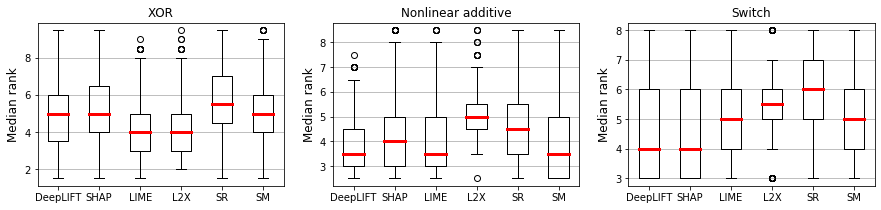

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

baselines = ['DeepLIFT', 'SHAP', 'LIME', 'L2X', 'SR', 'SM']

XOR_results                = [benchmark_dictionary[baseline]['XOR'] for baseline in baselines]
nonlinear_additive_results = [benchmark_dictionary[baseline]['nonlinear_additive'] for baseline in baselines]
switch_results             = [benchmark_dictionary[baseline]['switch'] for baseline in baselines]

axes[0].boxplot(XOR_results, medianprops = dict(linewidth=3, color='red'))
axes[0].set_title('XOR', fontsize=12)

axes[1].boxplot(nonlinear_additive_results, medianprops = dict(linewidth=3, color='red'))
axes[1].set_title('Nonlinear additive', fontsize=12)

axes[2].boxplot(switch_results, medianprops = dict(linewidth=3, color='red'))
axes[2].set_title('Switch', fontsize=12)

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(XOR_results))])
    ax.set_ylabel('Median rank', fontsize=12)

plt.setp(axes, xticks=[y+1 for y in range(len(XOR_results))],
         xticklabels=baselines)
plt.show() 

fig.savefig('boxplot_comparison.pdf', dpi=200,  bbox_inches='tight')

## References

[1] Jianbo Chen, Mitchell Stern, Martin J Wainwright, and Michael I Jordan. Kernel feature selection via conditional covariance minimization. *In Advances in Neural Information Processing Systems (NeurIPS)*, pages 6946–6955, 2017.

[2] Jianbo Chen, Le Song, Martin J Wainwright, and Michael I Jordan. Learning to explain: An information-theoretic perspective on model interpretation. *International Conference on Machine Learning (ICML)*, 2018.

[3] Scott M Lundberg and Su-In Lee. A unified approach to interpreting model predictions. *In Advances in Neural Information Processing Systems (NeurIPS)*, pages 4765–4774, 2017.

[4] Avanti Shrikumar, Peyton Greenside, and Anshul Kundaje. Learning important features through propagating activation differences. *In International Conference on Machine Learning (ICML)*, pages 3145–3153, 2017.

[5] Marco Tulio Ribeiro, Sameer Singh, and Carlos Guestrin. Why should i trust you?: Explaining the predictions of any classifier. *In Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining*, pages 1135–1144. ACM, 2016.

[6] Yiqun Wang, Nicholas Wagner, and James M Rondinelli. *Symbolic regression in materials science*. arXiv preprint arXiv:1901.04136, 2019.
